<a href="https://colab.research.google.com/github/fahriyegrl/bitcoin_predict_time_series_tensorflow/blob/main/bitcoin_prediction_time_series_forecasting_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Getting and downloading then Bitcoin historical data from here: https://coincodex.com/crypto/bitcoin/historical-data/

In [3]:
!wget https://github.com/fahriyegrl/bitcoin_predict_time_series_tensorflow/raw/main/bitcoin_2019-08-26_2024-08-24.csv

--2024-09-16 18:45:59--  https://github.com/fahriyegrl/bitcoin_predict_time_series_tensorflow/raw/main/bitcoin_2019-08-26_2024-08-24.csv
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fahriyegrl/bitcoin_predict_time_series_tensorflow/main/bitcoin_2019-08-26_2024-08-24.csv [following]
--2024-09-16 18:46:00--  https://raw.githubusercontent.com/fahriyegrl/bitcoin_predict_time_series_tensorflow/main/bitcoin_2019-08-26_2024-08-24.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 204004 (199K) [text/plain]
Saving to: ‘bitcoin_2019-08-26_2024-08-24.csv’

bitcoin_2019-08-26_ 100%[===================>

In [4]:
import pandas as pd

df = pd.read_csv('bitcoin_2019-08-26_2024-08-24.csv')
df.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-08-23,2024-08-24,60392.09,64851.37,60392.09,63979.97,1.096811e+11,1.218889e+12
1,2024-08-22,2024-08-23,61167.48,61379.44,59953.14,60386.02,1.099257e+11,1.197426e+12
2,2024-08-21,2024-08-22,59114.41,61813.19,58907.09,61109.99,1.094567e+11,1.180932e+12
3,2024-08-20,2024-08-21,59448.00,61315.96,58705.68,59056.01,1.036199e+11,1.185949e+12
4,2024-08-19,2024-08-20,58320.02,59562.71,57928.86,59562.71,9.317886e+10,1.157509e+12


In [5]:
df.tail()

,Start,End,Open,High,Low,Close,Volume,Market Cap
1820,2019-08-30,2019-08-31,9499.878802,9640.946925,9409.399994,9582.255358,1.614085e+10,1.709868e+11
1821,2019-08-29,2019-08-30,9755.839220,9755.839220,9388.612159,9493.755389,2.061784e+10,1.707816e+11
1822,2019-08-28,2019-08-29,10206.418980,10270.522245,9691.877126,9759.791528,1.522129e+10,1.803473e+11
1823,2019-08-27,2019-08-28,10380.720317,10380.720317,10090.229211,10219.413373,1.570331e+10,1.826662e+11
1824,2019-08-26,2019-08-27,10150.617721,10556.072516,10150.617721,10374.876617,1.716487e+10,1.852813e+11


In [6]:
df = pd.read_csv('bitcoin_2019-08-26_2024-08-24.csv',
                 parse_dates=['Start'],
                 index_col= ['Start'])
df.head()

,End,Open,High,Low,Close,Volume,Market Cap
Start,,,,,,,
2024-08-23,2024-08-24,60392.09,64851.37,60392.09,63979.97,1.096811e+11,1.218889e+12
2024-08-22,2024-08-23,61167.48,61379.44,59953.14,60386.02,1.099257e+11,1.197426e+12
2024-08-21,2024-08-22,59114.41,61813.19,58907.09,61109.99,1.094567e+11,1.180932e+12
2024-08-20,2024-08-21,59448.00,61315.96,58705.68,59056.01,1.036199e+11,1.185949e+12
2024-08-19,2024-08-20,58320.02,59562.71,57928.86,59562.71,9.317886e+10,1.157509e+12


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2024-08-23 to 2019-08-26
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   End         1825 non-null   object 
 1   Open        1825 non-null   float64
 2   High        1825 non-null   float64
 3   Low         1825 non-null   float64
 4   Close       1825 non-null   float64
 5   Volume      1825 non-null   float64
 6   Market Cap  1825 non-null   float64
dtypes: float64(6), object(1)
memory usage: 114.1+ KB


In [8]:
len(df)

1825

In [9]:
bitcoin_price_reversed = df.iloc[::-1]
bitcoin_price = pd.DataFrame(bitcoin_price_reversed['Close']).rename(columns={'Close':'price'})
bitcoin_price.head()

,price
Start,
2019-08-26,10374.876617
2019-08-27,10219.413373
2019-08-28,9759.791528
2019-08-29,9493.755389
2019-08-30,9582.255358


In [10]:
bitcoin_price.index.dtype

dtype('<M8[ns]')

In [11]:
len(bitcoin_price), bitcoin_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2019-08-26 to 2024-08-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   1825 non-null   float64
dtypes: float64(1)
memory usage: 28.5 KB


(1825, None)

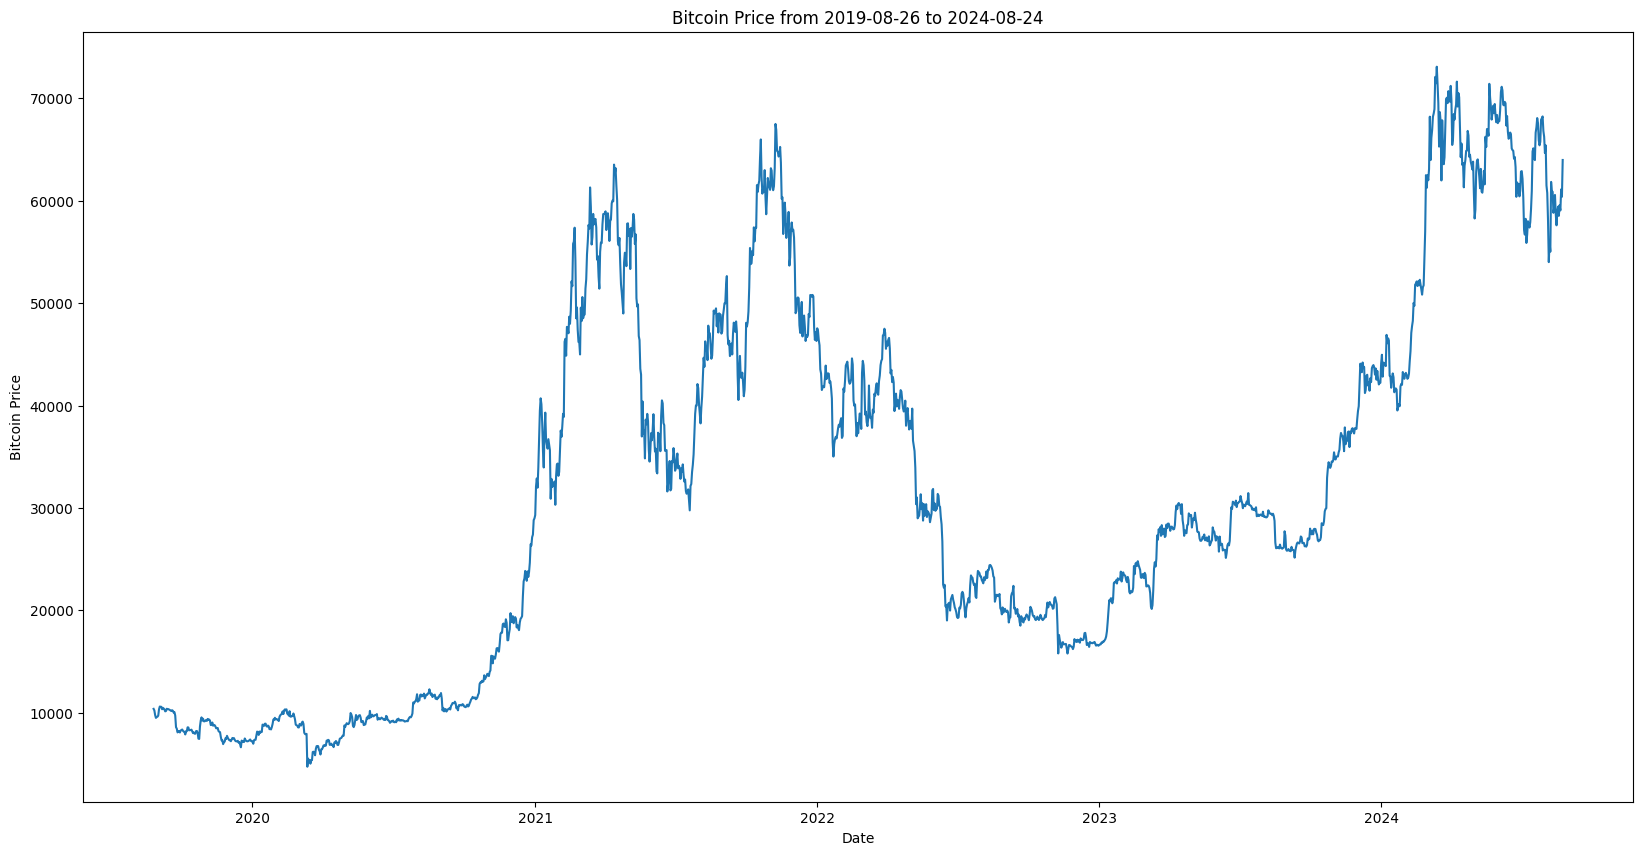

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(bitcoin_price)
plt.ylabel("Bitcoin Price")
plt.title("Bitcoin Price from 2019-08-26 to 2024-08-24")
plt.xlabel("Date")

plt.show()

In [13]:
bitcoin_price[:5]

,price
Start,
2019-08-26,10374.876617
2019-08-27,10219.413373
2019-08-28,9759.791528
2019-08-29,9493.755389
2019-08-30,9582.255358


In [14]:
timesteps = bitcoin_price.index.to_numpy()
prices = bitcoin_price['price'].to_numpy()

timesteps[:5], prices[:5]

(array(['2019-08-26T00:00:00.000000000', '2019-08-27T00:00:00.000000000',
        '2019-08-28T00:00:00.000000000', '2019-08-29T00:00:00.000000000',
        '2019-08-30T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([10374.87661724, 10219.41337325,  9759.79152841,  9493.75538921,
         9582.25535778]))

In [15]:
split = int(len(prices)  * 0.8)
split

1460

In [16]:
from os import X_OK
## Creating train and test datasets

# split = int(len(bitcoin_price)  * 0.8)
# split

X_train, y_train = timesteps[:split], prices[:split]
X_test, y_test = timesteps[split:], prices[split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(1460, 1460, 365, 365)

In [17]:
X_test.shape

(365,)

In [18]:
timesteps[:1]

array(['2019-08-26T00:00:00.000000000'], dtype='datetime64[ns]')

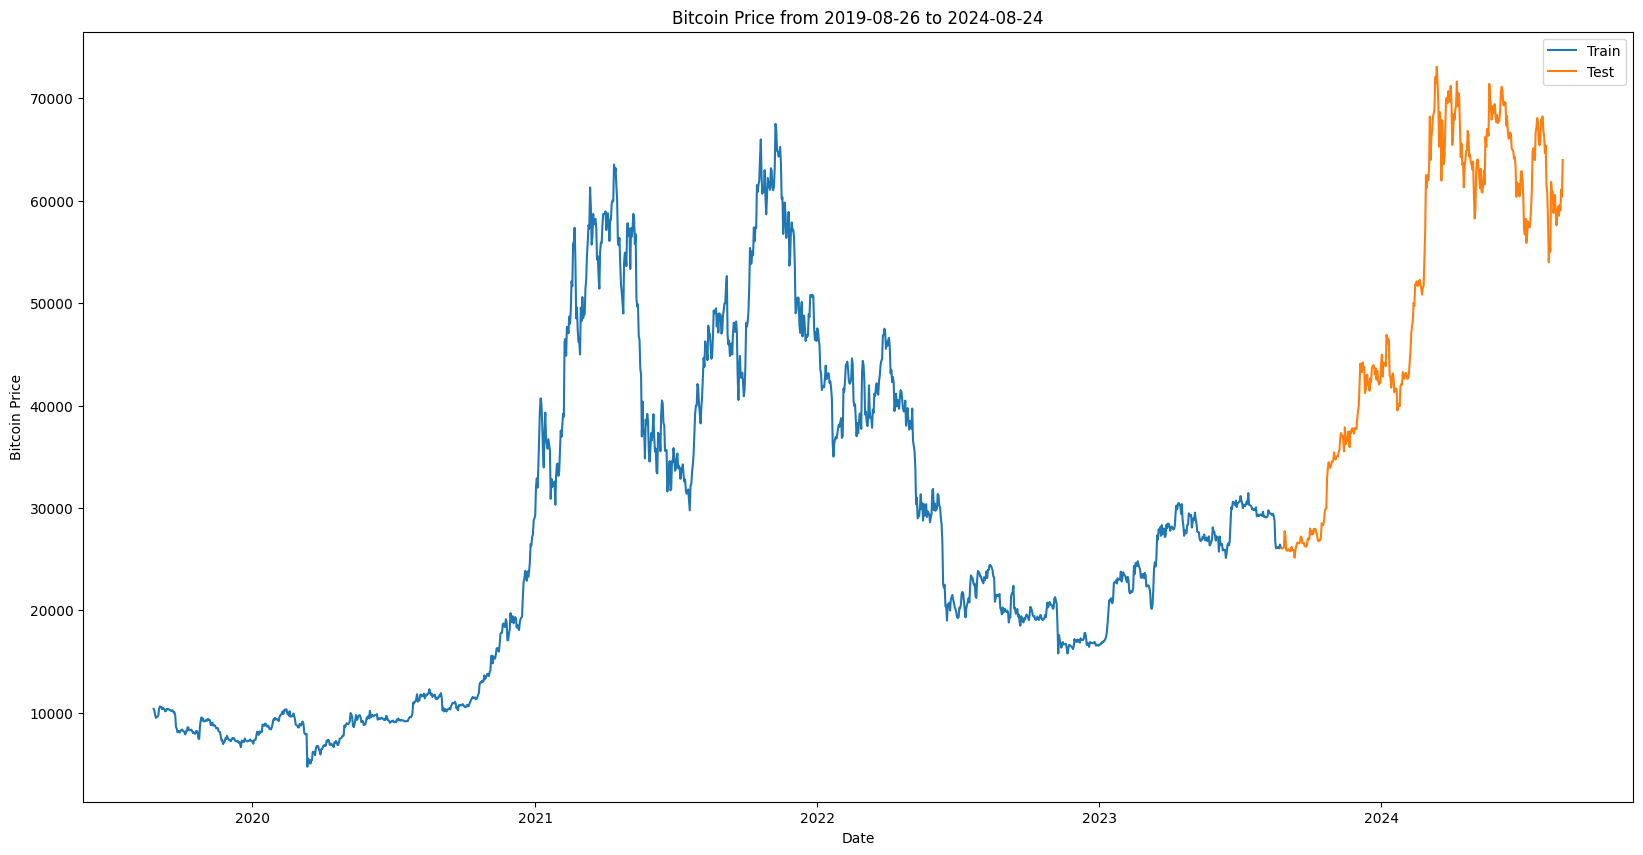

In [19]:
plt.figure(figsize=(20,10))
plt.plot(X_train, y_train)
plt.plot(X_test, y_test)
plt.legend(['Train', 'Test'])
plt.ylabel("Bitcoin Price")
plt.title("Bitcoin Price from 2019-08-26 to 2024-08-24")
plt.xlabel("Date")

plt.show()

In [20]:
## plot time series function to use later

def plot_time_series(timesteps, values, start=0, end=None, label=None ):

  plt.plot(timesteps[start:end], values[start:end])
  plt.xlabel("Time")
  plt.ylabel("Value")
  if label:
    plt.legend([label])
  plt.grid(True)

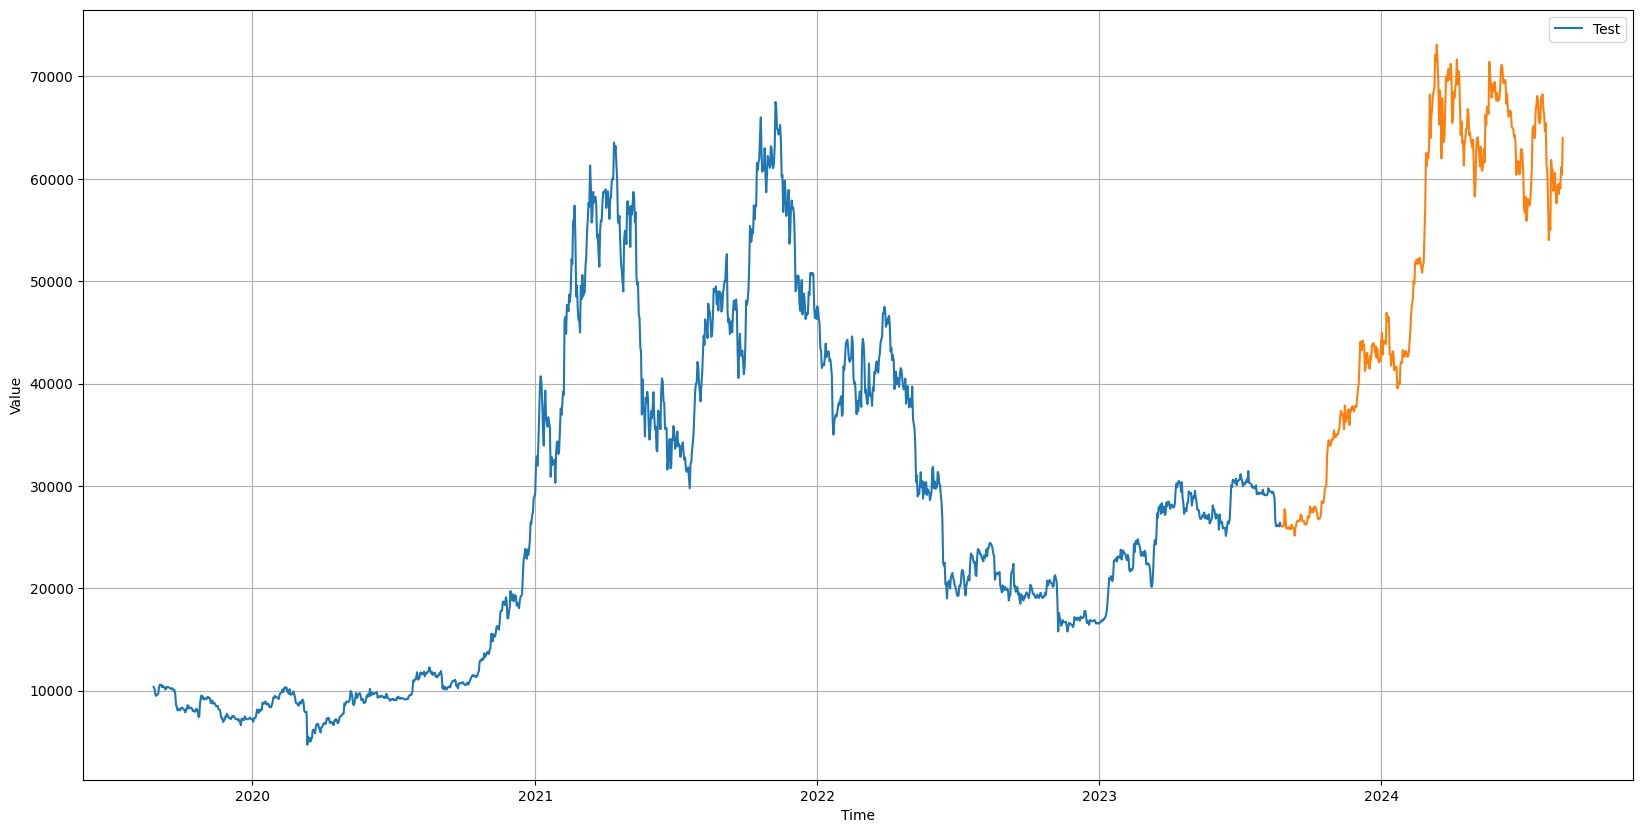

In [21]:
plt.figure(figsize=(20,10))
plot_time_series(timesteps=X_train, values = y_train, label='Train')
plot_time_series(timesteps=X_test, values = y_test, label='Test')

In [22]:
## Model 1: In this model, the prediction at time will be the value at time-1.

#

base_forecast = y_test[:-1]
base_forecast[:10]

array([26058.22, 26021.02, 26088.38, 26127.89, 27718.23, 27316.23,
       25936.45, 25816.57, 25856.93, 25980.6 ])

In [23]:
y_test[:10]

array([26058.22, 26021.02, 26088.38, 26127.89, 27718.23, 27316.23,
       25936.45, 25816.57, 25856.93, 25980.6 ])

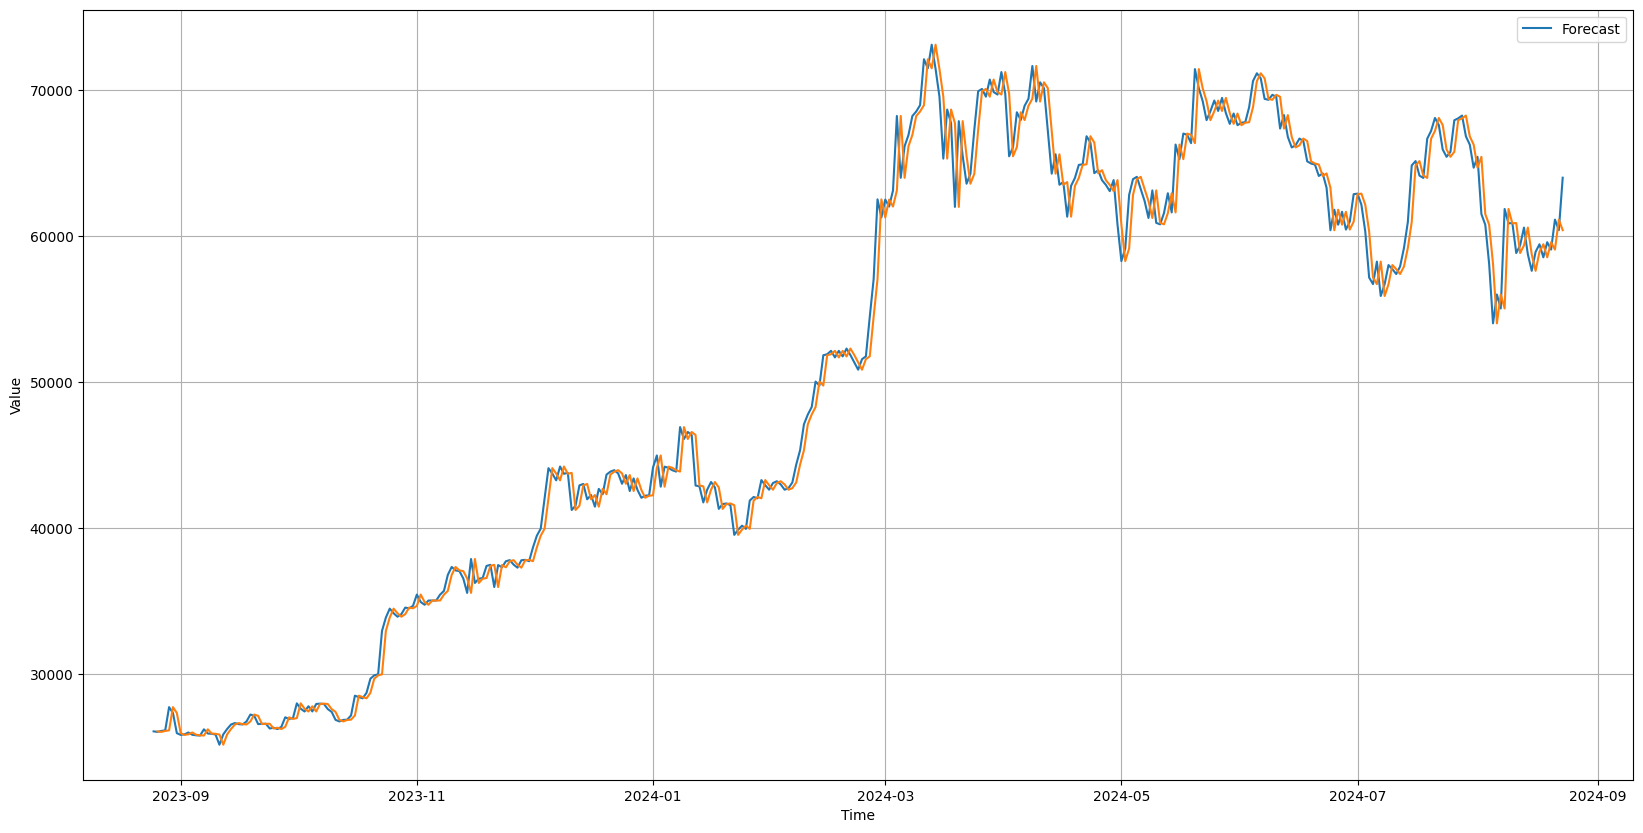

In [24]:
plt.figure(figsize=(20,10))
plot_time_series(timesteps=X_test, values = y_test, label='Test')
plot_time_series(timesteps=X_test[1:], values = base_forecast, label='Forecast')

In [25]:
import tensorflow as tf


#Regression metrics (which can also be used for time series forecasting):  lower is better.

# MAE - mean absolute error
# MSE - mean squared error
# RMSE - root mean square error
# MAPE/sMAPE - (symmetric) mean absolute percentage error


def evaluation(y_true, y_pred):

  mae_metric = tf.keras.metrics.MeanAbsoluteError()
  mae= mae_metric(y_true, y_pred)

  mse_metric = tf.keras.metrics.MeanSquaredError()
  mse = mse_metric(y_true, y_pred)

  rmse = tf.sqrt(mse)


  mape_metric = tf.keras.metrics.MeanAbsolutePercentageError()
  mape = mape_metric(y_true, y_pred)


  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "mape": mape.numpy()}


In [26]:
_base_forecast_evaluation = evaluation(y_test[1:], base_forecast)
_base_forecast_evaluation

{'mae': 996.01025, 'mse': 2205020.5, 'mape': 1.8600316}

In [27]:
## Updating the datasets to WINDOW and HORIZON

HORIZON = 1 # to predict one/next day
WINDOW = 7 # use the past seven days to predict Horizon


 ## Just trial on small data
def get_label_window(x, horizon=HORIZON):

  return x[:, :-horizon], x[:, -horizon:]

In [28]:
tf.range(8)

<tf.Tensor: shape=(8,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)>

In [29]:
fake_window, fake_label =  get_label_window(tf.expand_dims(tf.range(8), axis=0))
tf.squeeze(fake_window).numpy, tf.squeeze(fake_label).numpy

(<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(7,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6], dtype=int32)>>,
 <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=int32, numpy=7>>)

In [30]:
import numpy as np

window_size = 7
horizon = 1

window_step = window_size + horizon

np.arange(window_size + horizon)

window_step = np.expand_dims(np.arange(window_size + horizon),axis=0)  ## 2D
window_step

array([[0, 1, 2, 3, 4, 5, 6, 7]])

In [31]:
prices[:10], len(prices)

(array([10374.87661724, 10219.41337325,  9759.79152841,  9493.75538921,
         9582.25535778,  9609.78764737,  9716.72190969, 10329.85905157,
        10603.09546299, 10578.32020957]),
 1825)

In [32]:
window_index = window_step + np.expand_dims(np.arange(len(prices[:14]) - (window_size + horizon) - 1), axis=0).T

window_index

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 2,  3,  4,  5,  6,  7,  8,  9],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 4,  5,  6,  7,  8,  9, 10, 11]])

In [33]:
windows = prices[:14][window_index]
windows

array([[10374.87661724, 10219.41337325,  9759.79152841,  9493.75538921,
         9582.25535778,  9609.78764737,  9716.72190969, 10329.85905157],
       [10219.41337325,  9759.79152841,  9493.75538921,  9582.25535778,
         9609.78764737,  9716.72190969, 10329.85905157, 10603.09546299],
       [ 9759.79152841,  9493.75538921,  9582.25535778,  9609.78764737,
         9716.72190969, 10329.85905157, 10603.09546299, 10578.32020957],
       [ 9493.75538921,  9582.25535778,  9609.78764737,  9716.72190969,
        10329.85905157, 10603.09546299, 10578.32020957, 10574.499542  ],
       [ 9582.25535778,  9609.78764737,  9716.72190969, 10329.85905157,
        10603.09546299, 10578.32020957, 10574.499542  , 10339.45563157]])

In [34]:
## Bitcoinn prices = turn them to (Window, Horizon) 2D array

def make_windows(x, window_size= WINDOW, horizon=HORIZON):

  window_step = np.expand_dims(np.arange(window_size + horizon),axis=0)

  window_index = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis=0).T

  windows = x[window_index]

  window, label = get_label_window(windows, horizon= horizon)

  return window, label

In [35]:
len(prices)

1825

In [36]:
all_windows, all_labels = make_windows(prices,window_size=window_size,horizon=horizon )

len(all_windows), len(all_labels)

(1818, 1818)

In [37]:
all_windows[1].shape, all_labels[1].shape

((7,), (1,))

In [38]:
for i in range(5):
  print(all_windows[i], all_labels[i])

[10374.87661724 10219.41337325  9759.79152841  9493.75538921
  9582.25535778  9609.78764737  9716.72190969] [10329.85905157]
[10219.41337325  9759.79152841  9493.75538921  9582.25535778
  9609.78764737  9716.72190969 10329.85905157] [10603.09546299]
[ 9759.79152841  9493.75538921  9582.25535778  9609.78764737
  9716.72190969 10329.85905157 10603.09546299] [10578.32020957]
[ 9493.75538921  9582.25535778  9609.78764737  9716.72190969
 10329.85905157 10603.09546299 10578.32020957] [10574.499542]
[ 9582.25535778  9609.78764737  9716.72190969 10329.85905157
 10603.09546299 10578.32020957 10574.499542  ] [10339.45563157]


In [39]:
### Getiing Test and Train Data

split = int(len(prices)  * 0.8)


X_train, y_train = all_windows[:split], all_labels[:split]
X_test, y_test = all_windows[split:], all_labels[split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(1460, 1460, 358, 358)

In [40]:
split

1460

In [41]:
len(all_windows), len(all_labels)


(1818, 1818)

In [42]:
X_train[:3], y_train[:3]

(array([[10374.87661724, 10219.41337325,  9759.79152841,  9493.75538921,
          9582.25535778,  9609.78764737,  9716.72190969],
        [10219.41337325,  9759.79152841,  9493.75538921,  9582.25535778,
          9609.78764737,  9716.72190969, 10329.85905157],
        [ 9759.79152841,  9493.75538921,  9582.25535778,  9609.78764737,
          9716.72190969, 10329.85905157, 10603.09546299]]),
 array([[10329.85905157],
        [10603.09546299],
        [10578.32020957]]))

In [43]:
X_test[:3], y_test[:3]

(array([[26058.22, 26021.02, 26088.38, 26127.89, 27718.23, 27316.23,
         25936.45],
        [26021.02, 26088.38, 26127.89, 27718.23, 27316.23, 25936.45,
         25816.57],
        [26088.38, 26127.89, 27718.23, 27316.23, 25936.45, 25816.57,
         25856.93]]),
 array([[25816.57],
        [25856.93],
        [25980.6 ]]))

In [44]:
## Create a checkpoint callback

import os

def checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name + ".keras"),
                                            monitor="val_loss",
                                            verbose=0,
                                            save_best_only=True)

In [45]:
## Model 2: with single dense layer (window=7, horizon=1), Adam opt, MAE loss function
from tensorflow.keras import layers
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    layers.Dense(units=128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_2")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_2.fit(x=X_train,
            y=y_train,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(X_test, y_test),
            callbacks=[checkpoint(model_name="model_2.name")])


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 273ms/step - loss: 25060.2188 - mae: 25060.2188 - mse: 858435968.0000 - val_loss: 26730.8242 - val_mae: 26730.8242 - val_mse: 776999744.0000
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 9689.8936 - mae: 9689.8936 - mse: 144179552.0000 - val_loss: 3812.3792 - val_mae: 3812.3792 - val_mse: 21284148.0000
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3134.5364 - mae: 3134.5364 - mse: 17992584.0000 - val_loss: 1832.9420 - val_mae: 1832.9420 - val_mse: 6393346.0000
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1506.3364 - mae: 1506.3364 - mse: 5002942.5000 - val_loss: 1776.9735 - val_mae: 1776.9735 - val_mse: 6079270.5000
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1370.0458 - mae: 1370.0458 - mse: 4503730.0000 - val_loss: 2052.4160 - val_mae: 2052.4160 - val_mse: 7579316.0000
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1295.1263 - mae: 1295.1263 - mse: 4013604.7500 - val_loss: 1

In [46]:
model_2.evaluate(X_test, y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 849.6697 - mae: 849.6697 - mse: 1659274.7500


[1115.6761474609375, 1115.6761474609375, 2590440.0]

In [47]:
## Loading the best model

model_2 = tf.keras.models.load_model("model_experiments/model_2.name.keras")
model_2.evaluate(X_test, y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 768.5536 - mae: 768.5536 - mse: 1495342.2500


[1044.90771484375, 1044.90771484375, 2400651.0]

In [48]:
## Make a prediction

forecast = model_2.predict(X_test)
forecast.shape

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


(358, 1)

In [49]:
forecast[:10]

array([[26510.547],
       [25932.207],
       [25691.363],
       [25828.844],
       [25687.266],
       [25636.203],
       [25699.37 ],
       [25980.852],
       [25928.742],
       [25865.582]], dtype=float32)

In [50]:
X_test.shape

(358, 7)

In [51]:
tf.squeeze(X_test).shape

TensorShape([358, 7])

In [52]:
model_2_evaluation = evaluation(y_test, forecast)
model_2_evaluation

{'mae': 1044.9078, 'mse': 2400650.8, 'mape': 1.954251}

In [53]:
_base_forecast_evaluation

{'mae': 996.01025, 'mse': 2205020.5, 'mape': 1.8600316}

In [54]:
timesteps[:1]

array(['2019-08-26T00:00:00.000000000'], dtype='datetime64[ns]')

In [55]:
len(timesteps[1:])

1824

In [56]:
len(X_test), len(X_train), len(y_test), len(timesteps)

(358, 1460, 358, 1825)

In [57]:
X_test.shape

(358, 7)

In [58]:
timesteps.shape, bitcoin_price.shape

((1825,), (1825, 1))

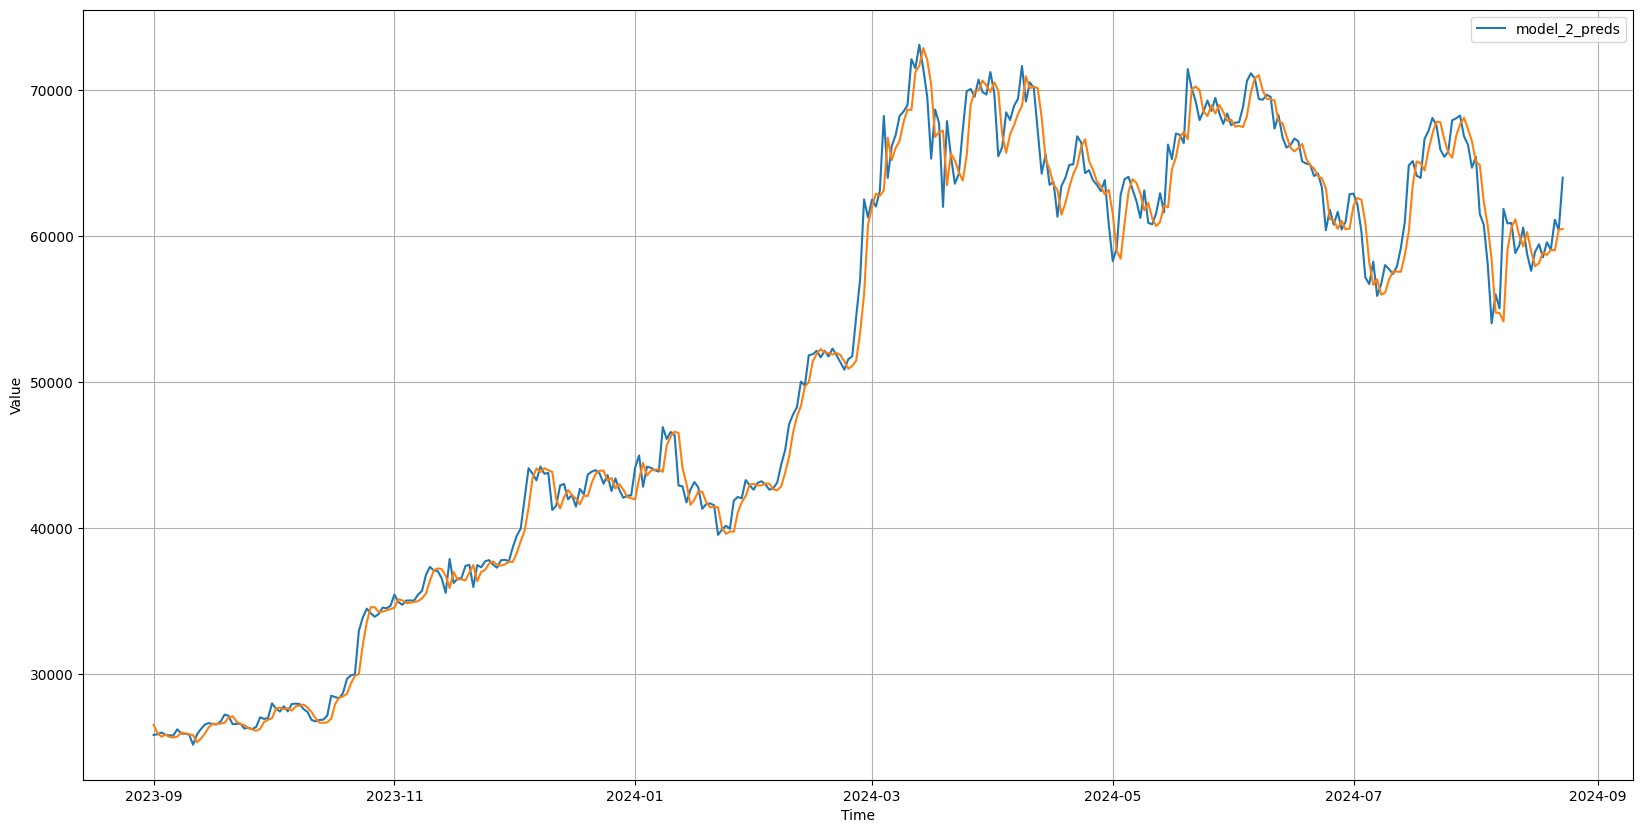

In [59]:
## Ploting the model_2 prediction

plt.figure(figsize=(20,10))
plot_time_series(timesteps= timesteps[1467:], values= bitcoin_price[1467:] ,label="Test")

plot_time_series(timesteps= timesteps[1467:],
                values= forecast,
                label="model_2_preds")

## Model 3:  Same model as Model 2 but 30 days window size and 1 day horizo


In [60]:
HORIZON = 1
WINDOW = 30

all_window, all_label = make_windows(prices, window_size=WINDOW, horizon=HORIZON)

len(all_window), len(all_label), len(prices)

(1795, 1795, 1825)

In [61]:
split, all_window[1].shape, all_label[1].shape

(1460, (30,), (1,))

In [62]:
## Train and test data

train_window , test_window, train_label, test_label = all_windows[:split], all_windows[split:], all_labels[:split], all_labels[split:]

len(train_window), len(test_window), len(train_label), len(test_label)

(1460, 358, 1460, 358)

In [63]:
train_window[:3], train_label[:3]

(array([[10374.87661724, 10219.41337325,  9759.79152841,  9493.75538921,
          9582.25535778,  9609.78764737,  9716.72190969],
        [10219.41337325,  9759.79152841,  9493.75538921,  9582.25535778,
          9609.78764737,  9716.72190969, 10329.85905157],
        [ 9759.79152841,  9493.75538921,  9582.25535778,  9609.78764737,
          9716.72190969, 10329.85905157, 10603.09546299]]),
 array([[10329.85905157],
        [10603.09546299],
        [10578.32020957]]))

In [64]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    layers.Dense(units=128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_3")

model_3.compile(loss="mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_3.fit(x=train_window, y=train_label,
            epochs=100,
            batch_size=32,
            verbose=0,
            validation_data=(test_window, test_label),
            callbacks=[checkpoint(model_name="model_3.name")])

In [65]:
model_3.evaluate(test_window, test_label)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1252.7996 - mae: 1252.7996 - mse: 2669970.2500


[1548.237548828125, 1548.237548828125, 3964612.25]

In [66]:
model_3= tf.keras.models.load_model("model_experiments/model_3.name.keras")
model_3.evaluate(test_window, test_label)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 742.2599 - mae: 742.2599 - mse: 1426783.6250


[1008.0158081054688, 1008.0158081054688, 2275873.5]

In [67]:
model_3_forecast = model_3.predict(test_window)
model_3_forecast.shape, tf.squeeze(test_window).shape


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


((358, 1), TensorShape([358, 7]))

In [68]:
model_3_evaluation = evaluation(test_label, model_3_forecast)
model_3_evaluation

{'mae': 1008.0158, 'mse': 2275873.5, 'mape': 1.880788}

In [69]:
model_2_evaluation

{'mae': 1044.9078, 'mse': 2400650.8, 'mape': 1.954251}

In [70]:
timesteps.shape, bitcoin_price.shape

((1825,), (1825, 1))

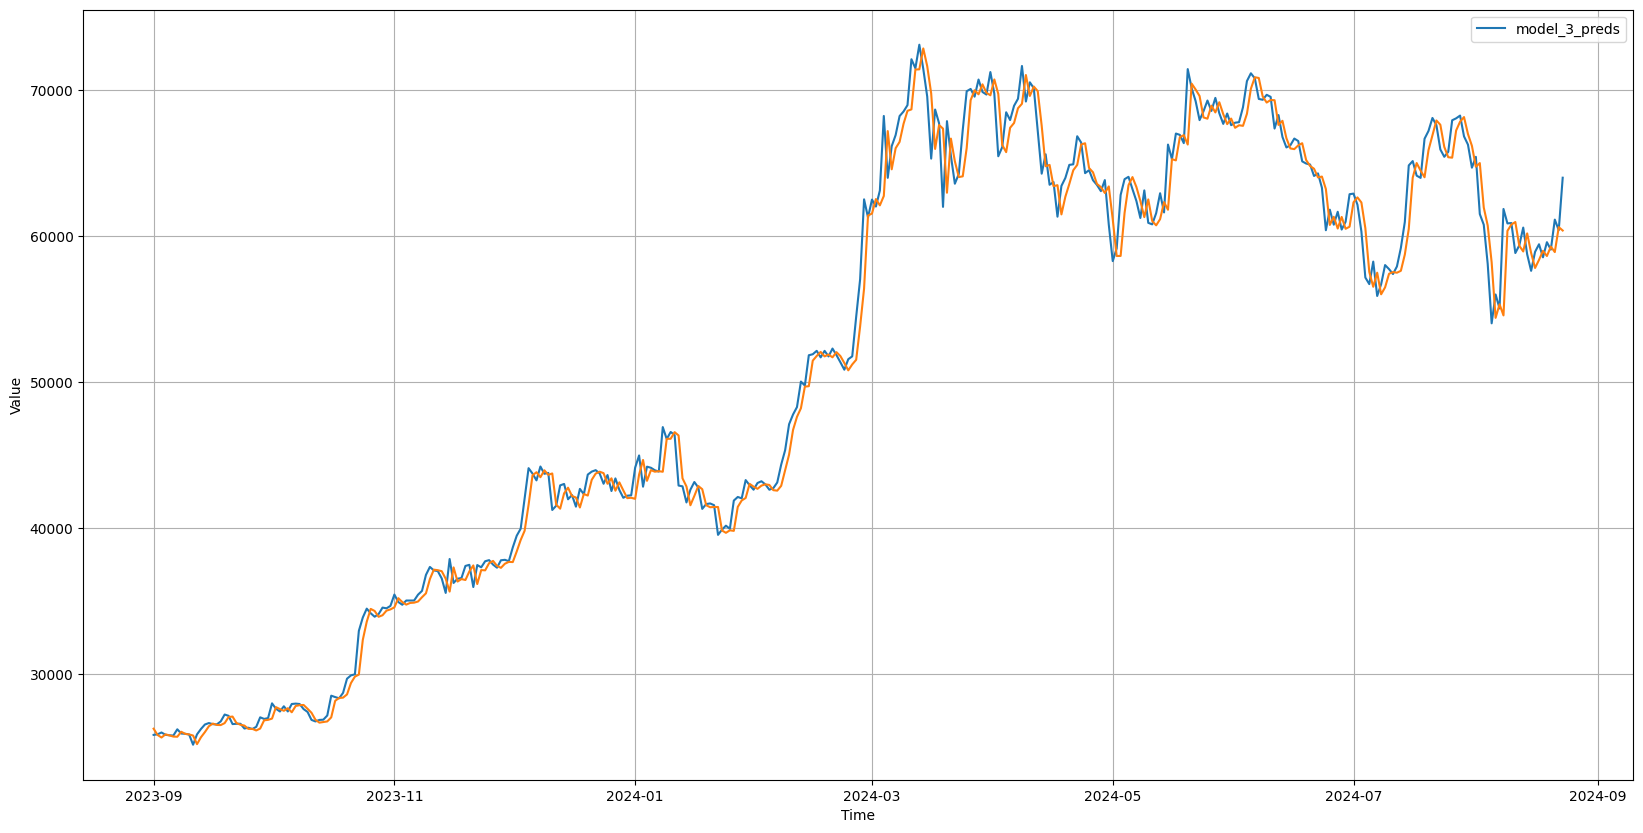

In [71]:
## Ploting the model_3 prediction

plt.figure(figsize=(20,10))
plot_time_series(timesteps= timesteps[1467:], values= bitcoin_price[1467:] ,label="Test")

plot_time_series(timesteps= timesteps[1467:],
                values= model_3_forecast,
                label="model_3_preds")

## Model 4: Window=30 and horizon=7

In [72]:
prices[:3], prices[-3:]

(array([10374.87661724, 10219.41337325,  9759.79152841]),
 array([61109.99, 60386.02, 63979.97]))

In [73]:
bitcoin_price[:3]

,price
Start,
2019-08-26,10374.876617
2019-08-27,10219.413373
2019-08-28,9759.791528


In [74]:
HORIZON = 7
WINDOW = 30

In [75]:
import numpy as np

def make_windows(x, window_size=WINDOW, horizon=HORIZON):


  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)


  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T

  windowed_array = x[window_indexes]

  windows, labels = get_label_window(windowed_array, horizon=horizon)
  return windows, labels

In [76]:
HORIZON = 7
WINDOW = 30

all_window, all_label = make_windows(prices, window_size=30, horizon=7)

len(all_window), len(all_label), len(prices)

(1789, 1789, 1825)

In [77]:
all_window[1], all_label[1]

(array([10219.41337325,  9759.79152841,  9493.75538921,  9582.25535778,
         9609.78764737,  9716.72190969, 10329.85905157, 10603.09546299,
        10578.32020957, 10574.499542  , 10339.45563157, 10477.09483846,
        10410.18764404, 10322.05760789, 10132.54480456, 10159.72047332,
        10387.51484121, 10346.59919496, 10353.54979822, 10313.44352598,
        10268.65798496, 10208.16581794, 10164.10190487, 10241.60879539,
        10179.86223084, 10006.06533083, 10050.18754113,  9719.39701861,
         8588.42490586,  8439.8461899 ]),
 array([8077.93635444, 8183.56987236, 8208.59598768, 8068.66873829,
        8269.02868158, 8294.74359665, 8361.91923314]))

In [78]:
all_label[1], all_label[1].shape, all_window[1].shape

(array([8077.93635444, 8183.56987236, 8208.59598768, 8068.66873829,
        8269.02868158, 8294.74359665, 8361.91923314]),
 (7,),
 (30,))

In [79]:
train_window , test_window, train_label, test_label = all_windows[split:], all_windows[:split], all_labels[split:], all_labels[:split]

len(train_window), len(test_window), len(train_label), len(test_label)

(358, 1460, 358, 1460)

In [80]:
train_window.shape, train_label.shape, test_window.shape, test_label.shape

((358, 7), (358, 1), (1460, 7), (1460, 1))

In [81]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    layers.Dense(units=128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_4")

model_4.compile(loss="MAE",
                optimizer = tf.keras.optimizers.Adam())

model_4.fit(train_window,
            train_label,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_window, test_label),
            callbacks=[checkpoint(model_name="model_4.name")])



In [82]:
model_4.evaluate(test_window, test_label)

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 893.5439


1149.47607421875

In [83]:
model_4 = tf.keras.models.load_model("model_experiments/model_4.name.keras")
model_4.evaluate(test_window, test_label)

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 893.5439


1149.47607421875

In [84]:
model_4.predict(test_window)

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[10061.187,  9907.135,  9773.815, ...,  9715.442, 10002.505,
        10040.532],
       [10141.274,  9903.751,  9825.356, ...,  9846.36 , 10054.109,
         9931.53 ],
       [10165.052, 10012.859,  9897.06 , ..., 10112.603, 10037.618,
         9800.902],
       ...,
       [26321.244, 26299.025, 26252.598, ..., 26159.05 , 26256.484,
        26410.158],
       [26929.438, 26509.592, 26581.992, ..., 26508.959, 26781.047,
        26632.314],
       [26985.787, 26887.188, 26506.75 , ..., 26991.955, 26706.54 ,
        26392.65 ]], dtype=float32)

In [85]:
model_4_forecast = model_4.predict(test_window)
model_4_forecast.shape, tf.squeeze(test_window).shape

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


((1460, 7), TensorShape([1460, 7]))

In [86]:
model_4_evaluation = evaluation(test_label, model_4_forecast)
model_4_evaluation

{'mae': 1149.476, 'mse': 3430271.8, 'mape': 4.139588}

In [87]:
model_3_evaluation, model_2_evaluation

({'mae': 1008.0158, 'mse': 2275873.5, 'mape': 1.880788},
 {'mae': 1044.9078, 'mse': 2400650.8, 'mape': 1.954251})

##  Model 5 : Conv1
Conv1 models can be used seq2seq problems.
WINDOW = 7 and HORIZON=1 many to one problem.

In [88]:
HORIZON = 1
WINDOW = 7

In [89]:
all_window, all_label = make_windows(prices, window_size=WINDOW,horizon=HORIZON )
len(all_window), len(all_label), all_window[1].shape, all_label[1].shape

(1818, 1818, (7,), (1,))

In [90]:
split = int(len(prices)  * 0.8)
split


1460

In [91]:
train_window, test_window, train_label, test_label = all_windows[:split], all_windows[split:], all_labels[:split], all_labels[split:]

len(train_window), len(test_window), len(train_label), len(test_label)

(1460, 358, 1460, 358)

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D

the input shape is (batch_shape, steps, channels)
steps is here WINDOW size also features
channels is here horizon

An example:
# The inputs are 128-length vectors with 10 timesteps, and the
# batch size is 4.
x = np.random.rand(4, 10, 128)
y = keras.layers.Conv1D(32, 3, activation='relu')(x)
print(y.shape)


In [92]:
x = tf.constant(train_window[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([10374.87661724, 10219.41337325,  9759.79152841,  9493.75538921,
        9582.25535778,  9609.78764737,  9716.72190969])>

In [93]:
expands_dim_x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))
expands_dim_x(x)

<tf.Tensor: shape=(7, 1), dtype=float32, numpy=
array([[10374.877],
       [10219.413],
       [ 9759.792],
       [ 9493.756],
       [ 9582.255],
       [ 9609.788],
       [ 9716.722]], dtype=float32)>

In [94]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
  layers.Conv1D(filters=128, kernel_size=5, padding='causal',  activation="relu"),
  layers.Dense(HORIZON)
], name= "model_5")

model_5.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam())

model_5.fit(train_window,
          train_label,
          batch_size=128,
          epochs=100,
          verbose=1,
          validation_data=(test_window, test_label),
          callbacks=[checkpoint(model_name="model_5.name")])



Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - loss: 28814.3242 - val_loss: 35024.2695
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 14526.6553 - val_loss: 9867.6641
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3103.4658 - val_loss: 5466.5864
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2243.8503 - val_loss: 3056.1194
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1521.6838 - val_loss: 1930.1376
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1253.8772 - val_loss: 1835.0764
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1185.0278 - val_loss: 1694.6462
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1165.1252 - val_loss: 1686.2159
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1162.3225 - val_loss: 1696.9290
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1156.7031 - val_loss: 1682.8795
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1151.0511 - val_loss: 1

In [95]:
model_5.summary()

Model: "model_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda_1 (Lambda)                    │ (None, 1, 7)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 1, 128)              │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1, 1)                │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,213 (55.52 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,476 (37.02 KB)

In [96]:
model_5.evaluate(test_window, test_label)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 803.4856


1077.2430419921875

In [97]:
model_5_preds = model_5.predict(test_window)
model_5_preds[0]

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


array([[26397.402]], dtype=float32)

In [98]:
model_5_evaluation = evaluation(test_label, model_5_preds)
model_5_evaluation

{'mae': 1077.243, 'mse': 2523397.5, 'mape': 2.0233293}

In [99]:
model_2_evaluation, model_3_evaluation, model_4_evaluation

({'mae': 1044.9078, 'mse': 2400650.8, 'mape': 1.954251},
 {'mae': 1008.0158, 'mse': 2275873.5, 'mape': 1.880788},
 {'mae': 1149.476, 'mse': 3430271.8, 'mape': 4.139588})

## Model 6: RNN (LTSM)
Recurrent neursl network is used to model sequential time series data.
One of layer in RNN is https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM
LSTM: Lost Short -Term Memory

In [100]:
WINDOW

7

In [101]:
def expand_dims(x):
    return tf.expand_dims(x, axis=1)

@tf.keras.utils.register_keras_serializable()
class ExpandDimsLayer(layers.Layer):
    def call(self, inputs):
        return expand_dims(inputs)

inputs = layers.Input(shape=(WINDOW,))
x = ExpandDimsLayer()(inputs)  # Wrap tf.expand_dims in a custom layer
x.shape
x = layers.LSTM(128, activation="relu")(x)
print(x.shape)
outputs = layers.Dense(HORIZON)(x)
model_6 = tf.keras.Model(inputs, outputs, name="model_6")

model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_6.fit(train_window,
            train_label,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_window, test_label),
            callbacks=[checkpoint(model_name="model_6.name")])

(None, 128)
Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 405ms/step - loss: 28324.5723 - val_loss: 49900.8711
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24566.3457 - val_loss: 42711.2109
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20859.2090 - val_loss: 35248.9336
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16914.1348 - val_loss: 26632.8047
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12279.7822 - val_loss: 16398.7930
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6801.3208 - val_loss: 4299.4590
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1688.3870 - val_loss: 3355.2996
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1666.5366 - val_loss: 1990.3047
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1291.7814 - val_loss: 1652.4634
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1175.1221 - val_loss: 1649.5378
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1142

In [102]:
# tf.random.set_seed(42)

# def expand_dims(x):
#     import tensorflow as tf  # Import TensorFlow inside the function
#     return tf.expand_dims(x, axis=1)

# inputs = layers.Input(shape=(WINDOW,))
# x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1), output_shape=(1, WINDOW))(inputs)

# #print(x.shape)
# x = layers.LSTM(128, activation="relu")(x)
# print(x.shape)
# outputs = layers.Dense(HORIZON)(x)
# model_6 = tf.keras.Model(inputs, outputs, name="model_6")

# model_6.compile(loss="mae",
#                 optimizer=tf.keras.optimizers.Adam())

# model_6.fit(train_window,
#             train_label,
#             epochs=100,
#             verbose=1,
#             batch_size=128,
#             validation_data=(test_window, test_label),
#             callbacks=[checkpoint(model_name="model_6.name")])




In [103]:
model_6.summary()

Model: "model_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ expand_dims_layer (ExpandDimsLayer)  │ (None, 1, 7)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128)                 │          69,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 209,285 (817.52 KB)

 Trainable params: 69,761 (272.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 139,524 (545.02 KB)

In [104]:
model_6.evaluate(test_window, test_label)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 927.5720


1265.2215576171875

In [105]:
model_6 = tf.keras.models.load_model("model_experiments/model_6.name.keras")
model_6.evaluate(test_window, test_label)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 927.5720


1265.2215576171875

In [106]:
model_6_preds = model_6.predict(test_window)
model_6_preds.shape

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


(358, 1)

In [107]:
model_6_evalaation= evaluation(test_label, model_6_preds)
model_6_evalaation

{'mae': 1265.2216, 'mse': 3297660.8, 'mape': 2.3732302}

In [108]:
model_5_evaluation, model_2_evaluation, model_3_evaluation, model_4_evaluation

({'mae': 1077.243, 'mse': 2523397.5, 'mape': 2.0233293},
 {'mae': 1044.9078, 'mse': 2400650.8, 'mape': 1.954251},
 {'mae': 1008.0158, 'mse': 2275873.5, 'mape': 1.880788},
 {'mae': 1149.476, 'mse': 3430271.8, 'mape': 4.139588})

## Model 7: A multivariate time series with Bitcoin block reward size.
The Bitcoin block reward size is the number of Bitcoin someone receives from mining a Bitcoin block.

The reward size is gotten from https://cryptoanswers.com/faq/bitcoin-halving-dates-history/

In [109]:
block_reward_1 = 50 # start date is 3 January 2009
block_reward_2 = 25 # 2012 Nov 28th
block_reward_3 = 12.5 #2016 July 9 th
block_reward_4 = 6.25  # 2020 May 11th
block_reward_5 = 3.125  #2024 April 20th
block_reward_6 = 1.56  #2028 April 20th

In [110]:
block_reward_3_time = np.datetime64("2016-07-09")
block_reward_4_time = np.datetime64("2020-05-11")
block_reward_5_time = np.datetime64("2024-04-20")

In [111]:
bitcoin_price.head()


,price
Start,
2019-08-26,10374.876617
2019-08-27,10219.413373
2019-08-28,9759.791528
2019-08-29,9493.755389
2019-08-30,9582.255358


In [112]:
bitcoin_price.index[0]

Timestamp('2019-08-26 00:00:00')

In [113]:
block_reward_4_days = (block_reward_4_time - bitcoin_price.index[0]).days
block_reward_5_days = (block_reward_5_time - bitcoin_price.index[0]).days
block_reward_4_days, block_reward_5_days

(259, 1699)

In [114]:
bitcoin_price_copy_block = bitcoin_price.copy()
bitcoin_price_copy_block["block_reward"] = None
bitcoin_price_copy_block.index = bitcoin_price_copy_block.index.astype("datetime64[ns]")
bitcoin_price_copy_block.head()


,price,block_reward
Start,,
2019-08-26,10374.876617,None
2019-08-27,10219.413373,None
2019-08-28,9759.791528,None
2019-08-29,9493.755389,None
2019-08-30,9582.255358,None


In [115]:
index_location_4 = bitcoin_price_copy_block.index.get_loc(block_reward_4_time)
#print(index_location_4)
index_location_5 = bitcoin_price_copy_block.index.get_loc(block_reward_5_time)
#print(index_location_5)
bitcoin_price_copy_block.iloc[:index_location_4, -1] = block_reward_4
bitcoin_price_copy_block.iloc[index_location_4 :index_location_5 , -1] = block_reward_5
bitcoin_price_copy_block.iloc[index_location_5 :, -1] = block_reward_6
bitcoin_price_copy_block

,price,block_reward
Start,,
2019-08-26,10374.876617,6.25
2019-08-27,10219.413373,6.25
2019-08-28,9759.791528,6.25
2019-08-29,9493.755389,6.25
2019-08-30,9582.255358,6.25
...,...,...
2024-08-19,59562.710000,1.56
2024-08-20,59056.010000,1.56
2024-08-21,61109.990000,1.56


<Axes: xlabel='Start'>

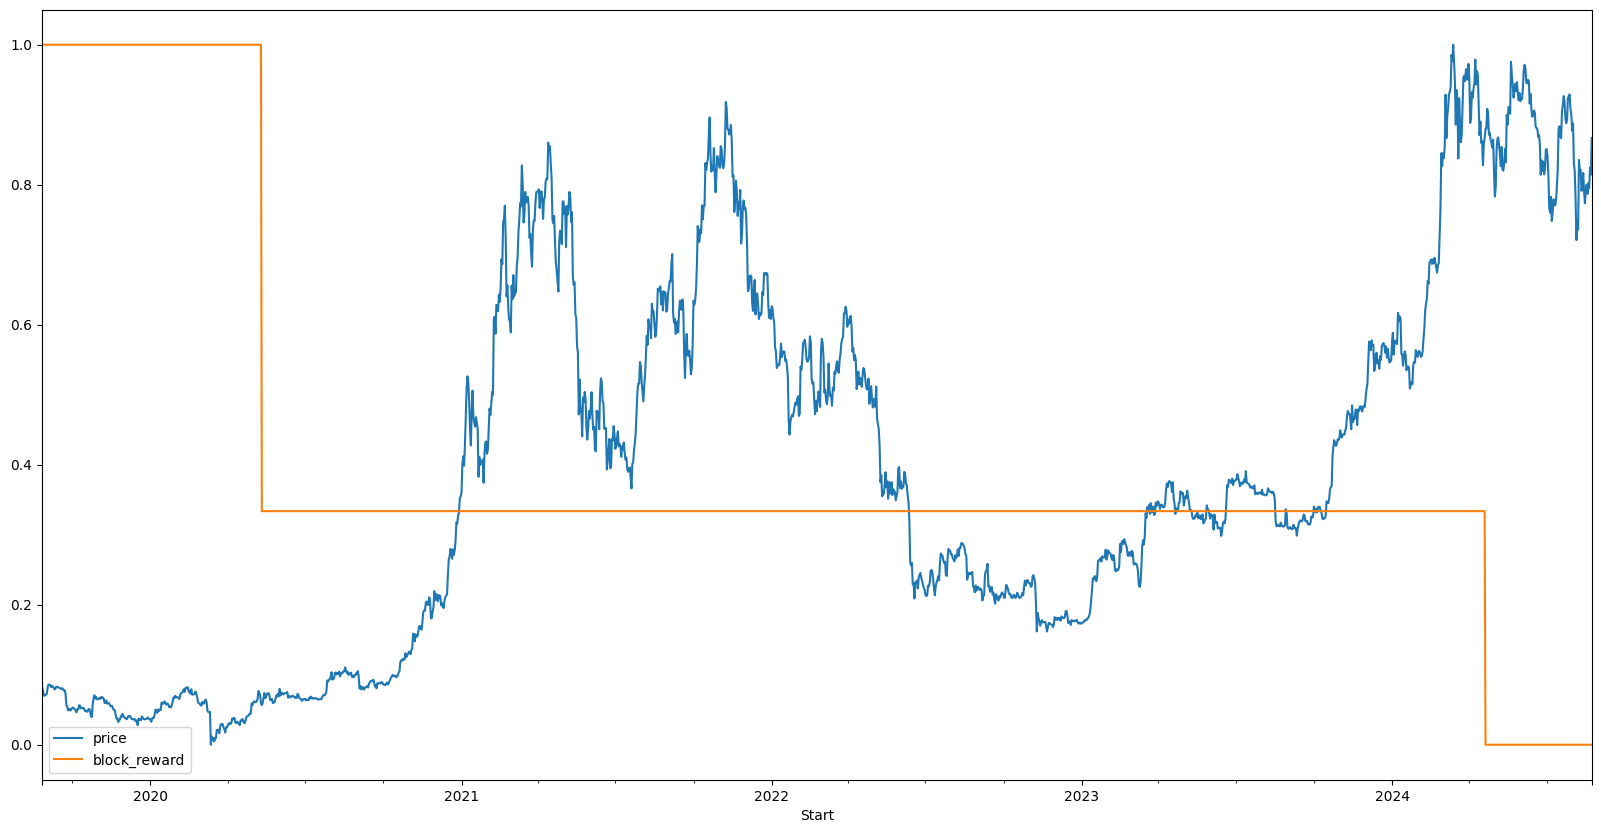

In [116]:
from sklearn.preprocessing import minmax_scale

price_df = pd.DataFrame(minmax_scale(bitcoin_price_copy_block[["price", "block_reward"]]),
                        columns =bitcoin_price_copy_block.columns,
                        index=bitcoin_price_copy_block.index )

price_df.plot(figsize=(20,10))

In [117]:
HORIZON = 1
WINDOW = 7

bitcoin_block_windowed = bitcoin_price_copy_block.copy()

for i in range(WINDOW):
  bitcoin_block_windowed[f"Price+{i+1}"] = bitcoin_price_copy_block["price"].shift(periods=i+1)

bitcoin_block_windowed.head(10)



,price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Start,,,,,,,,,
2019-08-26,10374.876617,6.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-27,10219.413373,6.25,10374.876617,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-28,9759.791528,6.25,10219.413373,10374.876617,NaN,NaN,NaN,NaN,NaN
2019-08-29,9493.755389,6.25,9759.791528,10219.413373,10374.876617,NaN,NaN,NaN,NaN
2019-08-30,9582.255358,6.25,9493.755389,9759.791528,10219.413373,10374.876617,NaN,NaN,NaN
2019-08-31,9609.787647,6.25,9582.255358,9493.755389,9759.791528,10219.413373,10374.876617,NaN,NaN
2019-09-01,9716.721910,6.25,9609.787647,9582.255358,9493.755389,9759.791528,10219.413373,10374.876617,NaN
2019-09-02,10329.859052,6.25,9716.721910,9609.787647,9582.255358,9493.755389,9759.791528,10219.413373,10374.876617
2019-09-03,10603.095463,6.25,10329.859052,9716.721910,9609.787647,9582.255358,9493.755389,9759.791528,10219.413373


In [118]:
X = bitcoin_block_windowed.dropna().drop("price", axis=1).astype(np.float32)
y = bitcoin_block_windowed.dropna()["price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Start,,,,,,,,
2019-09-02,6.25,9716.721680,9609.788086,9582.254883,9493.755859,9759.791992,10219.413086,10374.876953
2019-09-03,6.25,10329.859375,9716.721680,9609.788086,9582.254883,9493.755859,9759.791992,10219.413086
2019-09-04,6.25,10603.095703,10329.859375,9716.721680,9609.788086,9582.254883,9493.755859,9759.791992
2019-09-05,6.25,10578.320312,10603.095703,10329.859375,9716.721680,9609.788086,9582.254883,9493.755859
2019-09-06,6.25,10574.500000,10578.320312,10603.095703,10329.859375,9716.721680,9609.788086,9582.254883


In [119]:
y.head()

,price
Start,
2019-09-02,10329.859375
2019-09-03,10603.095703
2019-09-04,10578.320312
2019-09-05,10574.500000
2019-09-06,10339.456055


In [120]:
split = int(len(X) * 0.8)
split

1454

In [121]:
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(1454, 1454, 364, 364)

In [122]:
X_train.shape

(1454, 8)

In [123]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    layers.Dense(128, activation= "relu"),
    layers.Dense(HORIZON)], name = "model_7")

model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_7.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(X_test, y_test),
            callbacks=[checkpoint(model_name=model_7.name)])

In [124]:
model_7.summary()

Model: "model_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,845 (15.02 KB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,564 (10.02 KB)

In [125]:
model_7 = tf.keras.models.load_model("model_experiments/model_7.keras")
model_7.evaluate(X_test, y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 725.9944


998.7274780273438

In [126]:
model_7_preds = model_7.predict(X_test)
model_7_preds[:5]

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


array([[26145.406],
       [26064.35 ],
       [26078.92 ],
       [26182.057],
       [27323.88 ]], dtype=float32)

In [127]:
model_7_evaluation = evaluation(model_7_preds,y_test)
model_7_evaluation

{'mae': 998.7275, 'mse': 2261679.8, 'mape': 1.8894563}

In [128]:
 model_2_evaluation, model_3_evaluation, model_4_evaluation, model_5_evaluation, model_6_evalaation

({'mae': 1044.9078, 'mse': 2400650.8, 'mape': 1.954251},
 {'mae': 1008.0158, 'mse': 2275873.5, 'mape': 1.880788},
 {'mae': 1149.476, 'mse': 3430271.8, 'mape': 4.139588},
 {'mae': 1077.243, 'mse': 2523397.5, 'mape': 2.0233293},
 {'mae': 1265.2216, 'mse': 3297660.8, 'mape': 2.3732302})

Model 8 : N-BEATS Algorithm: https://arxiv.org/pdf/1905.10437



In [129]:
## Create a layer from Figure-1 in the paper

class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
              input_size: int,
              theta_size: int,
              horizon: int,
              n_neurons: int,
              n_layers: int,
              **kwargs):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size= theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]

    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs):
    x= inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)

    backcast, forecast = theta[:, :self.input_size] , theta[:, -self.horizon :]
    return backcast, forecast




In [130]:
WINDOW_SIZE = 7
HORIZON = 1

In [131]:
any_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) +1, axis=0)

In [132]:
any_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [133]:
nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                 theta_size = WINDOW_SIZE+ HORIZON,
                                 horizon=HORIZON,
                                 n_neurons=128,
                                 n_layers =4
                                 )


In [134]:
backcast, forecast = nbeats_block_layer(any_inputs)
backcast, forecast

(<tf.Tensor: shape=(1, 7), dtype=float32, numpy=
 array([[-0.17632921,  0.06142296,  0.6013855 , -0.3217116 ,  0.6437626 ,
          0.16237855, -0.11575454]], dtype=float32)>,
 <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.547636]], dtype=float32)>)

In [135]:
print(bitcoin_price.columns)

Index(['price'], dtype='object')


In [136]:
bitcoin_price.head()

,price
Start,
2019-08-26,10374.876617
2019-08-27,10219.413373
2019-08-28,9759.791528
2019-08-29,9493.755389
2019-08-30,9582.255358


In [137]:
bitcoin_price_8 = bitcoin_price.copy()

In [138]:
for i in range(WINDOW_SIZE):
  bitcoin_price_8[f"Price+{i+1}"] = bitcoin_price_8["price"].shift(periods=i+1)

bitcoin_price_8.head()

,price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Start,,,,,,,,
2019-08-26,10374.876617,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-27,10219.413373,10374.876617,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-28,9759.791528,10219.413373,10374.876617,NaN,NaN,NaN,NaN,NaN
2019-08-29,9493.755389,9759.791528,10219.413373,10374.876617,NaN,NaN,NaN,NaN
2019-08-30,9582.255358,9493.755389,9759.791528,10219.413373,10374.876617,NaN,NaN,NaN


In [139]:
bitcoin_price_8  = bitcoin_price_8.dropna()

In [140]:
bitcoin_price_8.head()

,price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Start,,,,,,,,
2019-09-02,10329.859052,9716.721910,9609.787647,9582.255358,9493.755389,9759.791528,10219.413373,10374.876617
2019-09-03,10603.095463,10329.859052,9716.721910,9609.787647,9582.255358,9493.755389,9759.791528,10219.413373
2019-09-04,10578.320210,10603.095463,10329.859052,9716.721910,9609.787647,9582.255358,9493.755389,9759.791528
2019-09-05,10574.499542,10578.320210,10603.095463,10329.859052,9716.721910,9609.787647,9582.255358,9493.755389
2019-09-06,10339.455632,10574.499542,10578.320210,10603.095463,10329.859052,9716.721910,9609.787647,9582.255358


In [141]:
split_size = int(len(bitcoin_price_8) * 0.8)
split_size, len(bitcoin_price_8)

(1454, 1818)

In [142]:
X = bitcoin_price_8.drop("price", axis=1)
y = bitcoin_price_8["price"]


In [143]:
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(1454, 1454, 364, 364)

In [144]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train))
train_label_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test))
test_label_dataset = tf.data.Dataset.from_tensor_slices(y_test)



In [145]:
train_dataset = tf.data.Dataset.zip((train_dataset, train_label_dataset))
test_dataset = tf.data.Dataset.zip((test_dataset, test_label_dataset))

In [146]:
BATCH_SIZE =1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [147]:
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS =30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

working on double residual stacking and use :
tf.keras.layers.subtract(input):  subtracts list of input tensors from each other
tf.keras.layers.add(inputs);  subtracts list of input tensors from each other

In [148]:
tensor_1 = tf.range(10) +10
tensor_1

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int32)>

In [149]:
tensor_2 = tf.range(10)
tensor_2

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [150]:
result_1 = tf.keras.layers.subtract([tensor_1, tensor_2])
result_2 = tf.keras.layers.add([tensor_1, tensor_2])
result_1, result_2

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28], dtype=int32)>)

In [151]:
result_1.numpy(), result_2.numpy()

(array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], dtype=int32),
 array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28], dtype=int32))

In [152]:
tf.random.set_seed(42)

nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons= N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock"
                                 )

In [153]:
stack_input = layers.Input(shape=(INPUT_SIZE,), name="stack_input")

backcast, forecast = nbeats_block_layer(stack_input)

In [154]:
residual = layers.subtract([stack_input, backcast], name="subtract")

In [155]:
for i, _ in enumerate(range(N_STACKS-1)):
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeastBlock_{i}")(residual)

  residual = layers.subtract([residual,backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast,block_forecast], name=f"add_{i}")


In [156]:

model_8 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_8")

model_8.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

model_8.fit(train_dataset,
            epochs=N_EPOCHS,
            verbose=0,
            validation_data=test_dataset,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])


Epoch 216: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 316: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.


In [157]:
model_8.evaluate(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 983.7956 - mae: 983.7956 - mse: 2203140.5000


[983.7955932617188, 983.7955932617188, 2203140.5]

In [158]:
model_8_preds = model_8.predict(test_dataset)
model_8_preds[:5]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


array([[26119.021],
       [26099.016],
       [26099.156],
       [26184.795],
       [27374.547]], dtype=float32)

In [159]:
model_8_results = evaluation(model_8_preds, y_test)
model_8_results

{'mae': 983.7955, 'mse': 2203140.5, 'mape': 1.8636465}

In [160]:
model_8.summary()

Model: "model_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ stack_input (InputLayer)  │ (None, 7)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ InitialBlock              │ [(None, 7), (None, 1)] │        796,168 │ stack_input[0][0]      │
│ (NBeatsBlock)             │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ subtract (Subtract)       │ (None, 7)              │              0 │ stack_input[0][0],     │
│                           │                        │                │ InitialBlock[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ NBeastBlock_0             │ [(None, 7), (None, 1)] │        796,168 │ subtract[0][0]         │
│ (NBeatsBlock)             │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ subtract_0 (Subtract)     │ (None, 7)              │              0 │ subtract[0][0],        │
│                           │                        │                │ NBeastBlock_0[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ NBeastBlock_1             │ [(None, 7), (None, 1)] │        796,168 │ subtract_0[0][0]       │
│ (NBeatsBlock)             │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ subtract_1 (Subtract)     │ (None, 7)              │              0 │ subtract_0[0][0],      │
│                           │                        │                │ NBeastBlock_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ NBeastBlock_2             │ [(None, 7), (None, 1)] │        796,168 │ subtract_1[0][0]       │
│ (NBeatsBlock)             │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ subtract_2 (Subtract)     │ (None, 7)              │              0 │ subtract_1[0][0],      │
│                           │                        │                │ NBeastBlock_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ NBeastBlock_3             │ [(None, 7), (None, 1)] │        796,168 │ subtract_2[0][0]       │
│ (NBeatsBlock)             │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ subtract_3 (Subtract)     │ (None, 7)              │              0 │ subtract_2[0][0],      │
│                           │                        │                │ NBeastBlock_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ NBeastBlock_4             │ [(None, 7), (None, 1)] │        796,168 │ subtract_3[0][0]       │
│ (NBeatsBlock)             │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ subtract_4 (Subtract)     │ (None, 7)              │              0 │ subtract_3[0][0],      │
│                           │                        │                │ NBeastBlock_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ NBeastBlock_5        

 Total params: 71,655,122 (273.34 MB)

 Trainable params: 23,885,040 (91.11 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 47,770,082 (182.23 MB)

In [161]:
model_8.save(model_8.name + ".keras")

MODEL 9: Ensemble Model meaning stacking different models

In [162]:
def ensembe_model(
    horizon=HORIZON,
    train_data= train_dataset,
    test_dataset = test_dataset,
    iteration=100,
    epochs=100,
    loss = ["mae","mse","mape"]):
  ensembe_models = []
  for i in range(iteration):
    for loss_function in loss:
      model = tf.keras.Sequential([
          layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          layers.Dense(HORIZON)
      ])
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      model.fit(train_dataset,
                epochs=epochs,
                verbose=0,
                validation_data=test_dataset,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])

      ensembe_models.append(model)
  return ensembe_models


In [163]:
models = ensembe_model(iteration=5,
                       epochs=1000)


Epoch 138: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 751: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 851: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 432: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 532: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 134: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 123: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 484: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 584: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 124: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 270: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 792: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 896: ReduceLROnPlateau reducing l

In [164]:
def ensembe_model_preds(ensembe_models, data):
  ensemble_preds = []
  for model in ensembe_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return ensemble_preds

In [165]:
ensemble_preds = ensembe_model_preds(models, test_dataset)
ensemble_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


[array([[26075.55 ],
        [26011.125],
        [26044.36 ],
        [26141.283],
        [27583.191],
        [27401.13 ],
        [26120.896],
        [25998.922],
        [25761.102],
        [25836.879],
        [25887.672],
        [25796.695],
        [25758.504],
        [26161.2  ],
        [25952.807],
        [25911.143],
        [25831.254],
        [25159.26 ],
        [25827.047],
        [26184.785],
        [26535.756],
        [26707.781],
        [26540.836],
        [26577.586],
        [26697.393],
        [27182.053],
        [27164.875],
        [26618.707],
        [26595.846],
        [26505.102],
        [26246.566],
        [26331.06 ],
        [26202.434],
        [26351.676],
        [26988.488],
        [26950.836],
        [27010.732],
        [27921.355],
        [27628.713],
        [27539.857],
        [27738.316],
        [27358.297],
        [27960.273],
        [27976.77 ],
        [27936.123],
        [27634.344],
        [27360.879],
        [2690

In [166]:
ensemble_preds[0].shape

(364, 1)

In [167]:
m = np.median(ensemble_preds, axis=0)
m

array([[26054.375],
       [26008.44 ],
       [26069.197],
       [26129.104],
       [27616.238],
       [27372.865],
       [26010.92 ],
       [25779.41 ],
       [25829.074],
       [26040.545],
       [25870.402],
       [25779.639],
       [25758.504],
       [26161.2  ],
       [25929.57 ],
       [25882.068],
       [25822.715],
       [25164.64 ],
       [25809.791],
       [26184.785],
       [26516.295],
       [26627.   ],
       [26540.836],
       [26501.705],
       [26701.6  ],
       [27177.373],
       [27100.29 ],
       [26572.299],
       [26547.531],
       [26561.69 ],
       [26287.732],
       [26313.9  ],
       [26202.434],
       [26354.723],
       [26978.08 ],
       [26892.678],
       [26936.943],
       [27881.742],
       [27616.545],
       [27434.54 ],
       [27704.945],
       [27405.092],
       [27923.154],
       [27948.   ],
       [27916.152],
       [27612.814],
       [27378.064],
       [26889.09 ],
       [26745.61 ],
       [26858.066],


In [168]:
ensembe_results = evaluation(y_true=y_test,
                             y_pred=np.median(ensemble_preds, axis=0))

ensembe_results

{'mae': 985.61066, 'mse': 2180450.0, 'mape': 1.8459158}

In [169]:
model_2_evaluation, model_3_evaluation, model_4_evaluation, model_5_evaluation, model_6_evalaation, model_7_evaluation, model_8_results

({'mae': 1044.9078, 'mse': 2400650.8, 'mape': 1.954251},
 {'mae': 1008.0158, 'mse': 2275873.5, 'mape': 1.880788},
 {'mae': 1149.476, 'mse': 3430271.8, 'mape': 4.139588},
 {'mae': 1077.243, 'mse': 2523397.5, 'mape': 2.0233293},
 {'mae': 1265.2216, 'mse': 3297660.8, 'mape': 2.3732302},
 {'mae': 998.7275, 'mse': 2261679.8, 'mape': 1.8894563},
 {'mae': 983.7955, 'mse': 2203140.5, 'mape': 1.8636465})

In [170]:
## standard deviation:

std = tf.math.reduce_std(ensemble_preds, axis=0)
#td

In [171]:
def get_up_and_down(preds):
  std = tf.math.reduce_std(preds, axis=0)
  interval = 1.96 * std
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean+interval
  return lower, upper

lower, upper = get_up_and_down(ensemble_preds)


Model 10: A model on the full historical data to make prediction

In [172]:
bitcoin_price_8.head()

,price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Start,,,,,,,,
2019-09-02,10329.859052,9716.721910,9609.787647,9582.255358,9493.755389,9759.791528,10219.413373,10374.876617
2019-09-03,10603.095463,10329.859052,9716.721910,9609.787647,9582.255358,9493.755389,9759.791528,10219.413373
2019-09-04,10578.320210,10603.095463,10329.859052,9716.721910,9609.787647,9582.255358,9493.755389,9759.791528
2019-09-05,10574.499542,10578.320210,10603.095463,10329.859052,9716.721910,9609.787647,9582.255358,9493.755389
2019-09-06,10339.455632,10574.499542,10578.320210,10603.095463,10329.859052,9716.721910,9609.787647,9582.255358


In [177]:
bitcoin_price_10 = bitcoin_price_8.copy()
bitcoin_price_10.head()

,price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Start,,,,,,,,
2019-09-02,10329.859052,9716.721910,9609.787647,9582.255358,9493.755389,9759.791528,10219.413373,10374.876617
2019-09-03,10603.095463,10329.859052,9716.721910,9609.787647,9582.255358,9493.755389,9759.791528,10219.413373
2019-09-04,10578.320210,10603.095463,10329.859052,9716.721910,9609.787647,9582.255358,9493.755389,9759.791528
2019-09-05,10574.499542,10578.320210,10603.095463,10329.859052,9716.721910,9609.787647,9582.255358,9493.755389
2019-09-06,10339.455632,10574.499542,10578.320210,10603.095463,10329.859052,9716.721910,9609.787647,9582.255358


In [179]:
X_all = bitcoin_price_10.drop(["price"], axis=1).to_numpy()

y_all = bitcoin_price_10["price"].to_numpy()
X_all.shape,y_all.shape

((1818, 7), (1818,))

In [181]:
all_dataset= tf.data.Dataset.from_tensor_slices(X_all)
all_label_dataset = tf.data.Dataset.from_tensor_slices(y_all)

dataset_10 = tf.data.Dataset.zip((all_dataset, all_label_dataset))
BATCH_SIZE=1024
dataset_10 = dataset_10.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_10

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [182]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
])

model_10.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

model_10.fit(dataset_10,
             epochs=100,
             verbose=0)

In [183]:
INTO_FUTURE =14

In [190]:
X_all.shape()

TypeError: 'tuple' object is not callable

In [188]:
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE):
  future_forecast= []
  last_window = values[-WINDOW_SIZE:]
  for _ in range(into_future):
    predict = model.predict(tf.expand_dims(last_window, axis=0))
    future_forecast.append(tf.squeeze(predict).numpy())
    last_window = np.append(last_window, predict)[-WINDOW_SIZE:]

  return future_forecast

In [192]:
future_forecast = make_future_forecast(y_all, model_10, INTO_FUTURE, window_size=WINDOW_SIZE)
future_forecast, len(future_forecast)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


([59110.973,
  58753.105,
  59483.98,
  60653.527,
  61135.656,
  61586.914,
  62005.113,
  59041.543,
  59065.66,
  60281.562,
  61417.777,
  61409.375,
  61533.523,
  60828.137],
 14)